In [61]:
import torch
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [62]:
#Creating the system of Ordinary Differential Equations
#S=Array of Species
#t= a time variable(Format needed for using odeint ode solver)
#R= stoichiometry matrix  (Coefficients of Reactions as Columns)
#r= Array of Reaction Rates starting from R1
def Dsys(S,t,R,r):
    dydt=np.zeros(len(S))
    for i in range(len(R)):
        for j in range(len(R[0])):
            dydt[i]=dydt[i]+S[j]*R[i,j]*r[j]
    return dydt        

In [63]:
R=np.array([[-1,1],[1,-1]]) #Example Reversible Reaction A->B,B->A
r=np.array([0.7,0.5])       #Reaction rates for A and B Respectively.

In [66]:
y0 = [25, 5.0]              #Initial Concentrations
t = np.linspace(0, 10, 101) #Time grid
sol = odeint(Dsys, y0, t, args=(R,r))  #solving ODE

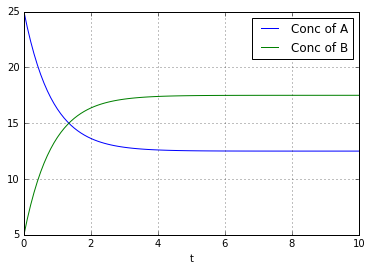

In [68]:
plt.plot(t, sol[:, 0], 'b', label='Conc of A')
plt.plot(t, sol[:, 1], 'g', label='Conc of B')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()